### 다층퍼셉트론 모델

In [1]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)
print(outputs<=0.5)

c:\Users\tempe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu


C:\Users\tempe\AppData\Local\Temp\ipykernel_1356\2497144837.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\tempe\AppData\Local\Temp\ipykernel_1356\2497144837.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.693
Epoch : 2000, Cost : 0.681
Epoch : 3000, Cost : 0.533
Epoch : 4000, Cost : 0.356
Epoch : 5000, Cost : 0.092
Epoch : 6000, Cost : 0.042
Epoch : 7000, Cost : 0.026
Epoch : 8000, Cost : 0.019
Epoch : 9000, Cost : 0.015
Epoch : 10000, Cost : 0.012
tensor([[0.0088],
        [0.9892],
        [0.9892],
        [0.0181]])
tensor([[ True],
        [False],
        [False],
        [ True]])


In [2]:
!pip install koreanize-matplotlib
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt

C:\Users\tempe\AppData\Local\Temp\ipykernel_1356\2987782820.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x >0, dtype=np.int)


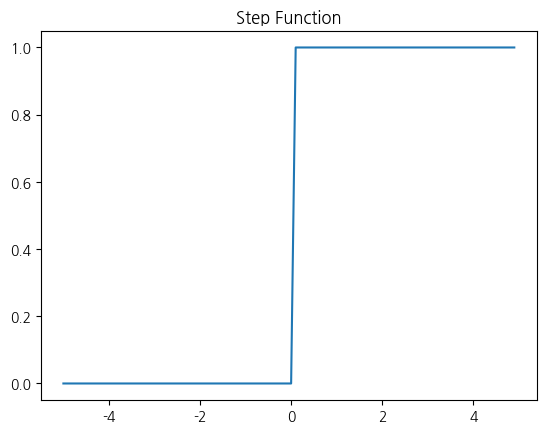

In [3]:
def step(x):
  return np.array(x >0, dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

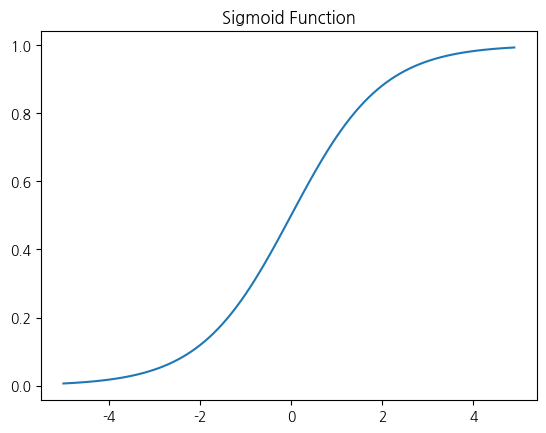

In [4]:
# 시크모이드 함수
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid Function')
plt.show()

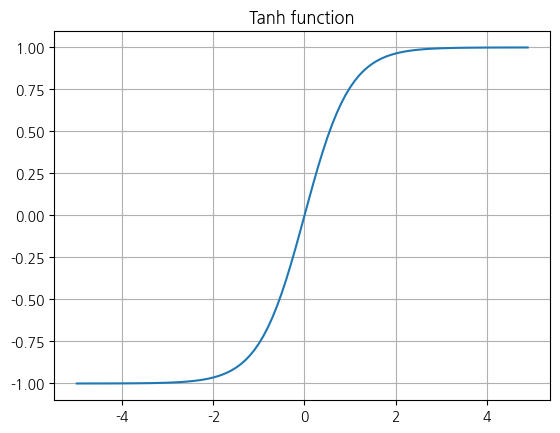

In [5]:
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)
plt.plot(x,y)
plt.grid()
plt.title('Tanh function')
plt.show()

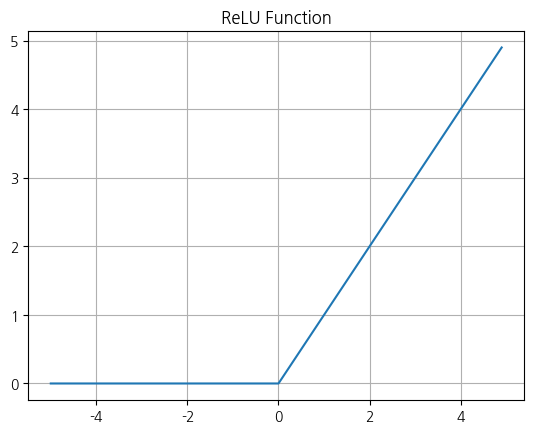

In [6]:
# ReLU
def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x,relu(x))
plt.grid()
plt.title('ReLU Function')
plt.show()

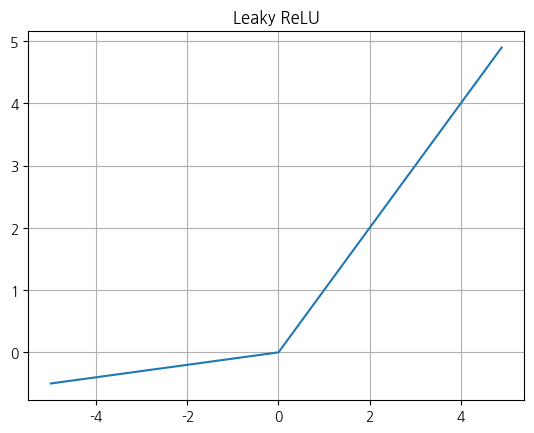

In [7]:
a = 0.1

def leaky_relu(x):
  return np.maximum(a*x,x)

plt.plot(x,leaky_relu(x))
plt.grid()
plt.title('Leaky ReLU')
plt.show()

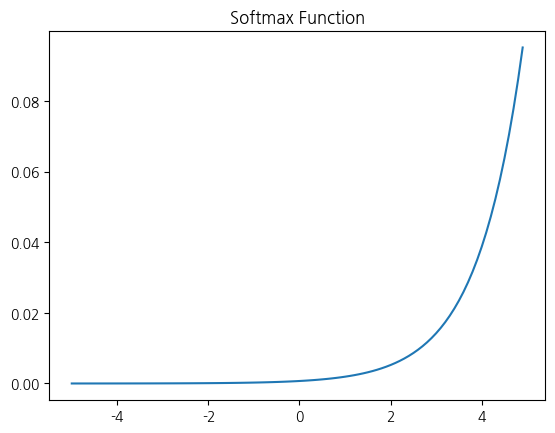

In [8]:
# Softmax
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()